1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [148]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

%matplotlib inline

In [149]:
# Generate normal distribution according to the problem
N = 5*10**3
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2
X = np.vstack((x1,x2,x3))
cov = np.cov(X)
print(cov)

[[ 0.99158306  1.01833847  3.00150459]
 [ 1.01833847 10.0644056  12.10108253]
 [ 3.00150459 12.10108253 18.10409172]]


Eigenvalues:
 [ 2.71864468e+01+0.j -1.32124438e-15+0.j  1.97363362e+00+0.j]

Eigenvectors:
 [[-0.11504582 -0.81649658  0.56577186]
 [-0.57788036 -0.40824829 -0.70667363]
 [-0.807972    0.40824829  0.42487008]]

Eigenvalues with SVD:
 [2.71926905e+01 1.97395774e+00 3.43729879e-32]

Eigenvectors with SVD:
 [[-0.1150139   0.56577835 -0.81649658]
 [-0.57792023 -0.70664103 -0.40824829]
 [-0.80794802  0.42491567  0.40824829]]

Variability:
 1.0


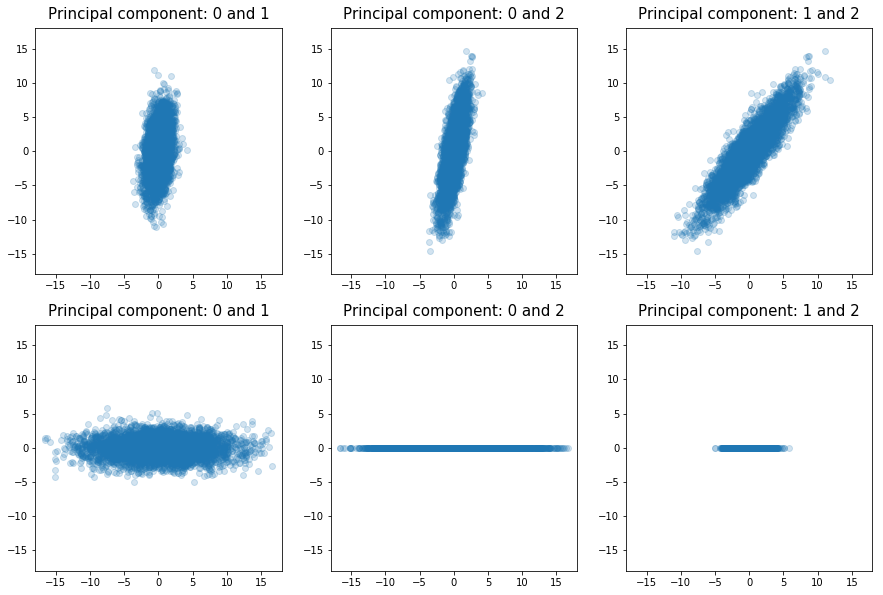

In [152]:
# Find eigenvectors and eigenvalues
lambdas, V = la.eig(cov)
print('Eigenvalues:\n',lambdas)
print('\nEigenvectors:\n',V)

# Do the SVD decomposition on the original dataset X
U, spectrum, Vt = la.svd(X)
l_svd = spectrum**2/(N-1)
V_svd = U
print('\nEigenvalues with SVD:\n',l_svd)
print('\nEigenvectors with SVD:\n',U)

# Take the two biggest eigenvalues (first two)
# As we cn see from the resul all the varriability of the dataset is catch from the first two eigenvectors
# This fact is not so strange, in fact the last row of the dataset is a linear combination of the two previous row
variability = (l_svd[0]+l_svd[1])/l_svd.sum() # ~1.0
print('\nVariability:\n', variability)

# New basis: all eigenvector
# Then from that basis I will select only the X_new's components corresponding to the 
# two vector for the reduced basis
V_pca = U.T
X_new = V_pca.dot(X)

# Create the graph
fig = plt.figure(figsize=(15, 10))

# Subplot data in the original basis
scale_factor = 1
value = 18
num = 1
for i in range(3):
    for j in range(i+1,3):
        ax = fig.add_subplot(2, 3, num, aspect=1)
        ax.scatter(X[i,:],X[j,:], alpha = 0.2)
        ax.set_title("Principal component: " + str(i) + 
            " and " + str(j), fontsize=15, verticalalignment='bottom')
        ax.axis([-value,value,-value,value])
        num = num+1

# Subplot data in the new basis
for i in range(3):
    for j in range(i+1,3):
        ax = fig.add_subplot(2, 3, num, aspect=1)
        ax.scatter(X_new[i,:],X_new[j,:], alpha = 0.2)
        ax.set_title("Principal component: " + str(i) + 
            " and " + str(j), fontsize=15, verticalalignment='bottom')
        ax.axis([-value,value,-value,value])
        num = num+1

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Eigenvalues with SVD:
 [9.99091204e+00 8.93814729e-01 1.02367587e-02 9.95830522e-03
 6.63979252e-03 6.30315155e-03 3.61163755e-03 1.64079212e-03
 1.61433110e-03 4.00532162e-04 3.90811113e-04 3.85206430e-04]

Variability:
 0.9962308562227057


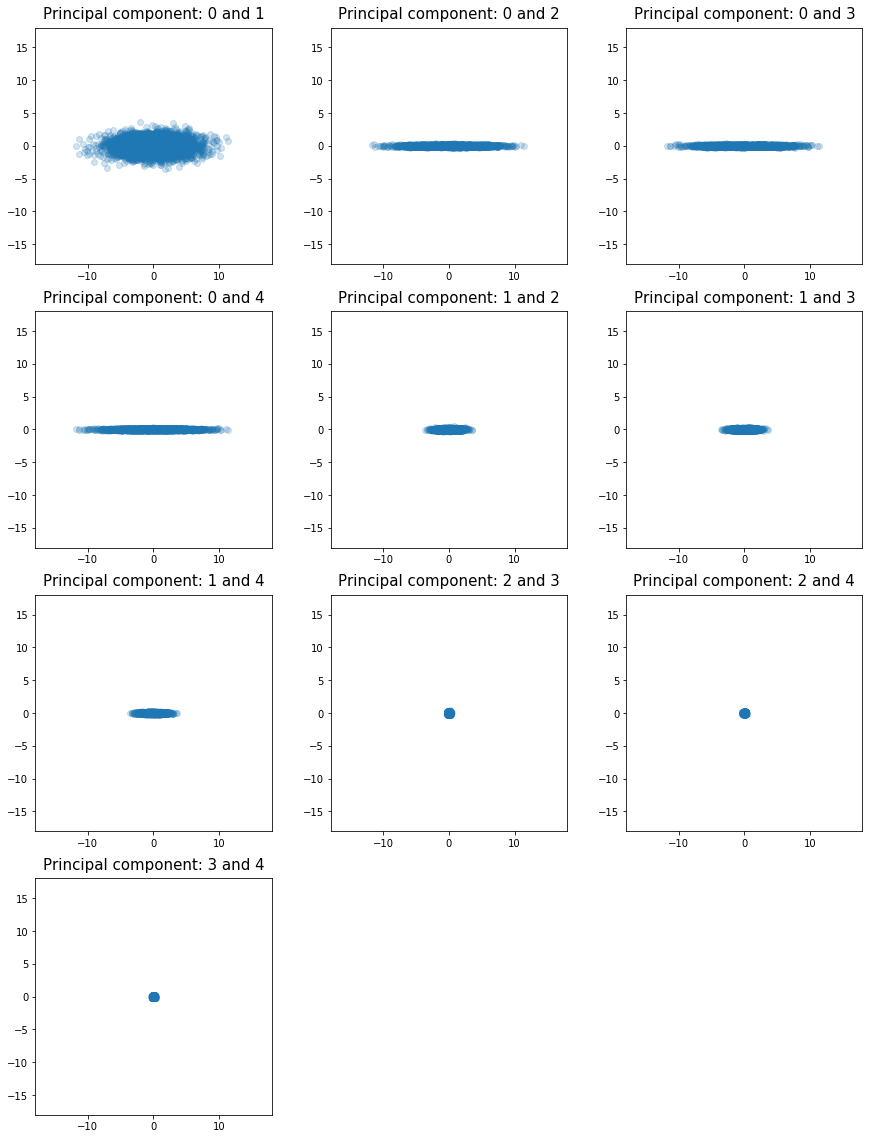

In [146]:
X_red = X[:2,:]

for x in range(10):
    # Generate std randomly
    # pick a number betweeen 1 and 5 and then divide it by 50 to make it small enough
    std = np.random.randint(1,6)/50
    x_temp = np.random.normal(loc=0, scale=std, size=N)
    X_red = np.vstack((X_red, x_temp))

# Get covance matrix
cov = np.cov(X_red)

# Get eigenvectors and eigenvalues
U, spectrum, Vt = la.svd(X_red)
l_svd = spectrum**2/(N-1)
V_svd = U
print('Eigenvalues with SVD:\n',l_svd)

# Compute the variability
variability = (l_svd[0]+l_svd[1])/l_svd.sum()
print('\nVariability:\n', variability)

# As we can see from the result the main part of the variablity is still contained in 
# the two biggest eigenvector

# New basis: all eigenvector
# Then from that basis I will select only the X_new's components corresponding to the 
# two vector for the reduced basis
V_pca = U.T
X_new = V_pca.dot(X_red)

# Create the graph
fig = plt.figure(figsize=(15, 20))

# Subplot data in the new basis
# I have plotted only some projections (not all, which are too many) to see the main trend
# of the pca reduction: the first two vector contains the main variability of the set, and the other are meaningless
value = 18
num = 1
num_vec = 5
for i in range(num_vec):
    for j in range(i+1,num_vec):
        ax = fig.add_subplot(4, 3, num, aspect=1)
        ax.scatter(X_new[i,:],X_new[j,:], alpha = 0.2)
        ax.axis([-value,value,-value,value])
        ax.set_title("Principal component: " + str(i) + 
              " and " + str(j),
              fontsize=15, verticalalignment='bottom')
        num = num + 1

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


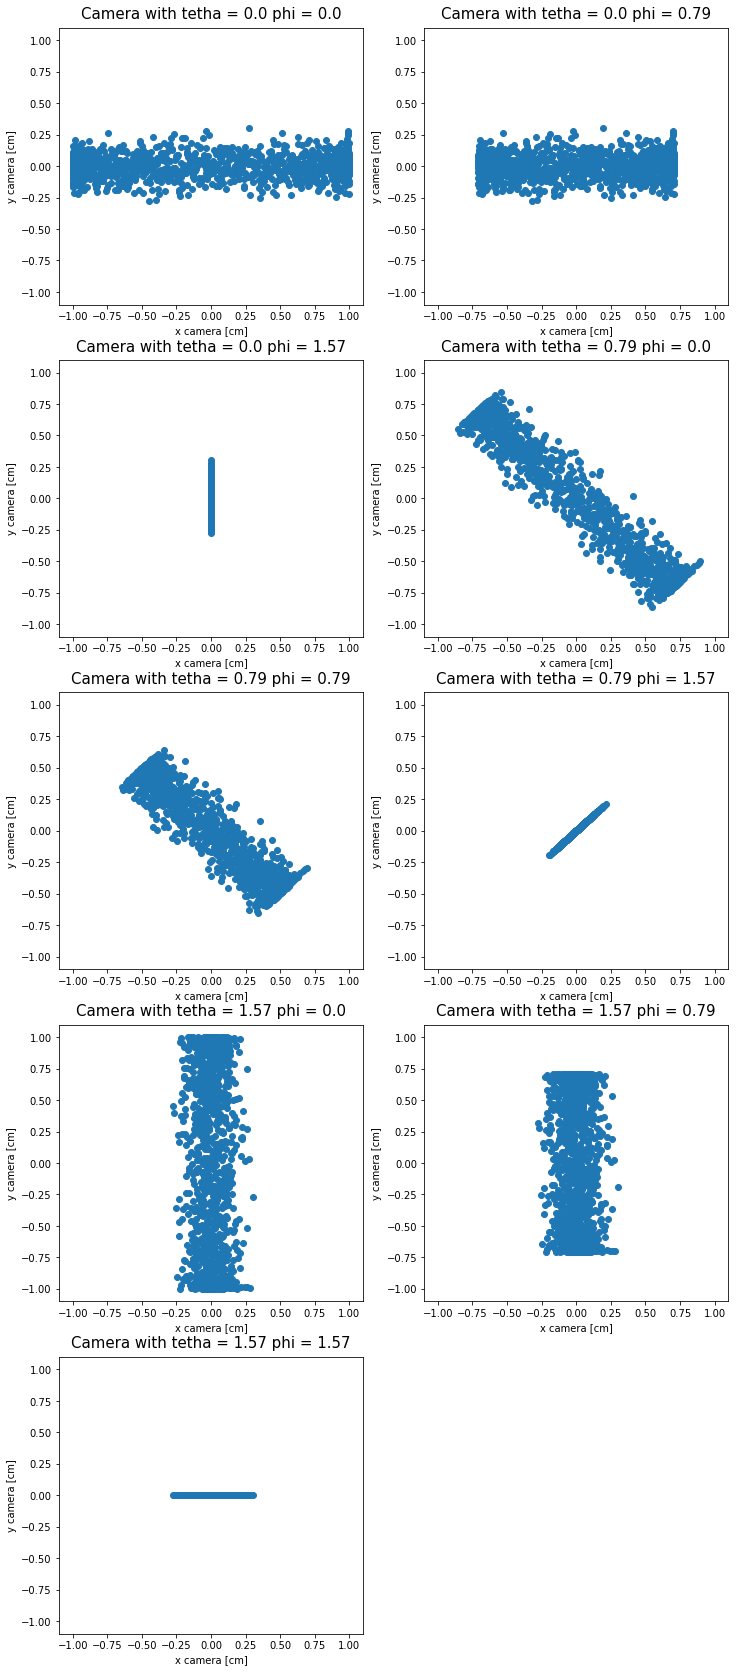

In [86]:
N = 10**3 # Total number of samples
t = np.linspace(0,2*np.pi,N)
spring_x = np.cos(t)
noise_y = np.random.normal(loc=0, scale=0.1, size=N) # Little noise

# Coordinates of the spring in time
spring_coordinates = np.vstack((np.vstack((spring_x,noise_y)),np.zeros(N)))

# Generate the spherical coord of the cameras
samples = 3
cameras_theta = np.linspace(0,np.pi/2,samples)
cameras_phi = np.linspace(0,np.pi/2,samples)
cameras_coord = np.zeros((samples**2,2))
rotated_spring = np.zeros((samples**2,N,3))

# Rotate the data accordin to the position of the cameras
i = 0
for theta in cameras_theta:
    for phi in cameras_phi:
        # Rotation around z axis
        z_rotation = np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
        # Rotation around y axis
        y_rotation = np.array([[np.cos(phi), 0, np.sin(phi)], [0, 1, 0], [-np.sin(phi), 0, np.cos(phi)]])
        # Combine together the two rotations
        rotation = z_rotation.dot(y_rotation)
        # Apply the rotation to the original data
        rotated_spring[i] = rotation.dot(spring_coordinates).T
        cameras_coord[i] = np.array([theta, phi])
        i += 1

# Plot the result
cols = 2
rows = np.ceil(samples**2)
plt.figure(figsize = (12,6*rows))
for k in range(1,samples**2+1):
    plt.subplot(rows,cols,k)
    plt.scatter(rotated_spring[k-1,:,0],rotated_spring[k-1,:,1])
    plt.xlabel("x camera [cm]")
    plt.ylabel("y camera [cm]")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.title("Camera with tetha = " + str(round(cameras_coord[k-1,0],2)) + 
              " phi = " + str(round(cameras_coord[k-1,1],2)),
              fontsize=15, verticalalignment='bottom')

In [85]:
# Principal Component Analysis
U, spectrum, Vt = np.linalg.svd(rotated_spring)
l_svd = spectrum**2/(N-1)
variability = l_svd/np.sum(l_svd)

print('Variability per each principal component:\n',variability)

Variability per each principal component:
 [[1.09037273e-01 2.07383844e-03 0.00000000e+00]
 [1.09037273e-01 2.07383844e-03 1.00059995e-32]
 [1.09037273e-01 2.07383844e-03 2.55833629e-65]
 [1.09037273e-01 2.07383844e-03 0.00000000e+00]
 [1.09037273e-01 2.07383844e-03 1.62073089e-34]
 [1.09037273e-01 2.07383844e-03 4.49908499e-35]
 [1.09037273e-01 2.07383844e-03 0.00000000e+00]
 [1.09037273e-01 2.07383844e-03 4.44288879e-33]
 [1.09037273e-01 2.07383844e-03 1.07919444e-65]]


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [101]:
# Load csv in a similar way we did during the Lecture on OSEMN
file_name="~/data/magic04.data"
data = pd.read_csv(file_name, names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','fCategory'])

# There are some chars in the file, so I transform them in numbers
data.loc[data['fCategory'] =='g', 'fCategory'] = 0
data.loc[data['fCategory'] =='h', 'fCategory'] = 1

# Compute the covariance of the dataset
data_cov = np.cov(data.T)
U, spectrum, Vt = la.svd(data_cov)
eigs_sum = np.sum(spectrum)

# Check correctness: the two result must be equal 
print("Trace of covariance matrix:",data_cov.trace()) 
print("Sum of all the eigenvalues:",eigs_sum)

# Principal component analysis
print ("\nVariability per each principal component:\n",spectrum/eigs_sum)

# We can select only the first three eigenvalues to capture the majority of the variability of the dataset
print ("\nVariability with the first three eigenvalues:\n",np.sum(spectrum[:4])/eigs_sum)

Trace of covariance matrix: 14938.246709706407
Sum of all the eigenvalues: 14938.246709706402

Variability per each principal component:
 [4.40466498e-01 2.57987592e-01 1.34981328e-01 8.88172454e-02
 4.08498986e-02 2.90261107e-02 7.85438231e-03 1.04326075e-05
 5.77816391e-06 7.09203170e-07 2.57395320e-08]

Variability with the first three eigenvalues:
 0.9222526627260887
